### Import tools

In [14]:
# visualize and process data
import pandas as pd 
import numpy as np
import seaborn as sns

# Tokenize, lemmatize, remove stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nrclex import NRCLex
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


dataset = pd.read_csv("TaylorSwift.csv")

dataset.head(5)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\biabc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\biabc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\biabc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Taylor Swift,​cardigan,folklore,2020.0,2020-07-24,vintage tee brand new phone high heels on cobb...
1,1,Taylor Swift,​exile,folklore,2020.0,2020-07-24,justin vernon i can see you standing honey wit...
2,2,Taylor Swift,Lover,Lover,2019.0,2019-08-16,we could leave the christmas lights up 'til ja...
3,3,Taylor Swift,​the 1,folklore,2020.0,2020-07-24,i'm doing good i'm on some new shit been sayin...
4,4,Taylor Swift,Look What You Made Me Do,reputation,2017.0,2017-08-25,i don't like your little games don't like your...


### Cleaning data

In [2]:
taylor_vers = [ i for i in dataset['Album'] if i in ("Speak Now(Taylor's Version)", "Red (Taylor's Version)", "Fearless")]
taylor_vers

#Checking if there's any taylor's vesion album, because that would mean repeated songs

['Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless']

In [3]:
dataset = dataset.dropna(subset=['Lyric'])

#Removing the rows where the lyrics are missing because the 'Lyric' column will be our main parameter for the analysis

### Tokenazation 

In [4]:
stop_words = set(stopwords.words('english'))

lyrics = [i for i in dataset['Lyric']] # putting lyrics in a list



tokenized_lyrics = []

for i in lyrics: # tokenization
    tokenized_lyrics.append(word_tokenize(i)) # tokenizing every word from every lyric



filtered_lyrics = []

for i in tokenized_lyrics: # removing stop words
    col = []
    for j in i: 
        if j.lower() not in stop_words and j.isalnum():
            col.append(j.lower())
        
        filtered_lyrics.append(col) # filling the filtered_lyrics list


print(filtered_lyrics[1])


['vintage', 'tee', 'brand', 'new', 'phone', 'high', 'heels', 'cobblestones', 'young', 'assume', 'know', 'nothing', 'sequin', 'smile', 'black', 'lipstick', 'sensual', 'politics', 'young', 'assume', 'know', 'nothing', 'knew', 'dancin', 'levi', 'drunk', 'streetlight', 'knew', 'hand', 'sweatshirt', 'baby', 'kiss', 'better', 'refrain', 'felt', 'like', 'old', 'cardigan', 'someone', 'bed', 'put', 'said', 'favorite', 'friend', 'friend', 'none', 'chase', 'two', 'girls', 'lose', 'one', 'young', 'assume', 'know', 'nothing', 'knew', 'playing', 'hideandseek', 'giving', 'weekends', 'knew', 'heartbeat', 'high', 'line', 'twenty', 'lifetimes', 'refrain', 'felt', 'like', 'old', 'cardigan', 'someone', 'bed', 'put', 'said', 'favorite', 'kiss', 'cars', 'downtown', 'bars', 'needed', 'drew', 'stars', 'around', 'scars', 'bleedin', 'knew', 'steppin', 'last', 'train', 'marked', 'like', 'bloodstain', 'knew', 'tried', 'change', 'ending', 'peter', 'losing', 'wendy', 'knew', 'leavin', 'like', 'father', 'running', '

### Lemmatizing


In [12]:
lemmatizer = WordNetLemmatizer() # creating lemmatizer

lyrics_lemma = []
for l in filtered_lyrics:
    song_lemma = []
    for p in l:
        song_lemma.append(lemmatizer.lemmatize(p)) # applying the lemmatizer for each word in each lyric
    lyrics_lemma.append(song_lemma) # combining all lematized lyrics in a list

    


In [13]:
print(lyrics_lemma[1])

['vintage', 'tee', 'brand', 'new', 'phone', 'high', 'heel', 'cobblestone', 'young', 'assume', 'know', 'nothing', 'sequin', 'smile', 'black', 'lipstick', 'sensual', 'politics', 'young', 'assume', 'know', 'nothing', 'knew', 'dancin', 'levi', 'drunk', 'streetlight', 'knew', 'hand', 'sweatshirt', 'baby', 'kiss', 'better', 'refrain', 'felt', 'like', 'old', 'cardigan', 'someone', 'bed', 'put', 'said', 'favorite', 'friend', 'friend', 'none', 'chase', 'two', 'girl', 'lose', 'one', 'young', 'assume', 'know', 'nothing', 'knew', 'playing', 'hideandseek', 'giving', 'weekend', 'knew', 'heartbeat', 'high', 'line', 'twenty', 'lifetime', 'refrain', 'felt', 'like', 'old', 'cardigan', 'someone', 'bed', 'put', 'said', 'favorite', 'kiss', 'car', 'downtown', 'bar', 'needed', 'drew', 'star', 'around', 'scar', 'bleedin', 'knew', 'steppin', 'last', 'train', 'marked', 'like', 'bloodstain', 'knew', 'tried', 'change', 'ending', 'peter', 'losing', 'wendy', 'knew', 'leavin', 'like', 'father', 'running', 'like', 'w

### Emotion column

In [5]:
# Now, let's do the average of emotions in each song
# Because we're using NRClex (lexicon), for now we will use the non-filtered version of the lyrics
from collections import Counter

emotions = []

for i in lyrics:  # Here we give the song the average emotion in it
    
    e = NRCLex(i)
    if e.affect_list:  # Verifica se a lista não está vazia
        mode = max(e.affect_list, key=Counter(e.affect_list).get)
        emotions.append(mode)
    else:
        ind = dataset.loc[dataset['Lyric'] == i].index
        dataset = dataset.drop(ind) # remove songs wich do not contain valid lyrics
    
dataset['Emotion'] = emotions




In [6]:
dataset.head(5)

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric,Emotion
0,0,Taylor Swift,​cardigan,folklore,2020.0,2020-07-24,vintage tee brand new phone high heels on cobb...,positive
1,1,Taylor Swift,​exile,folklore,2020.0,2020-07-24,justin vernon i can see you standing honey wit...,fear
2,2,Taylor Swift,Lover,Lover,2019.0,2019-08-16,we could leave the christmas lights up 'til ja...,positive
3,3,Taylor Swift,​the 1,folklore,2020.0,2020-07-24,i'm doing good i'm on some new shit been sayin...,positive
4,4,Taylor Swift,Look What You Made Me Do,reputation,2017.0,2017-08-25,i don't like your little games don't like your...,negative


In [8]:
# Here we can se the emotions for the first 5 songs in the dataset

dataset['Emotion'].mode()

0    positive
Name: Emotion, dtype: object

- From that we can assume that most of Taylor Swift's songs are related to positive fellings, Love songs.

### Exploring our data

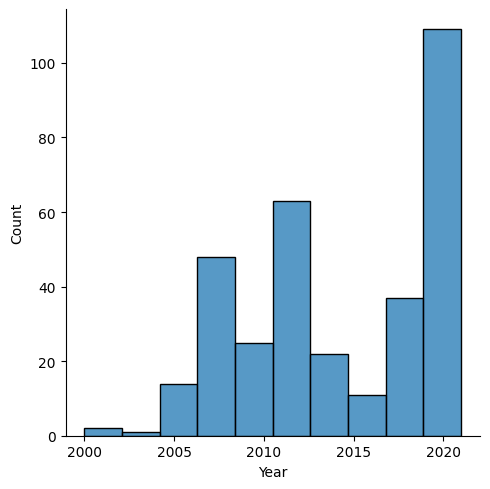

In [9]:
sns.displot(data=dataset, x ='Year', bins = 10)

# Most of the songs where released in 2010-2020, when taylor swift was ascending in the industry

In [12]:
sns.heatmap(dataset, annot=True)

ValueError: could not convert string to float: 'Taylor Swift'